# Sieci neuronowe i deep learning - Lab 6

# CNN i transfer learning - zadania na ocenę

## Zadanie 1 (5 pkt)

- Załaduj zbiór danych (np. CIFAR-10);
- Wyświetl kilka przykładowych obrazów;
- Zdefiniuj prostą sieć konwolucyjną (maksymalnie 3 warstwy konwolucyjne) do klasyfikacji obrazów.
- Ucz model przez 10 epok, korzystając z wybranego przez siebie optymalizatora.
- Wykreśl wykres dokładności (accuracy) i funkcji straty (loss) na przestrzeni epok, zarówno dla zbioru treningowego jak i walidacyjnego.

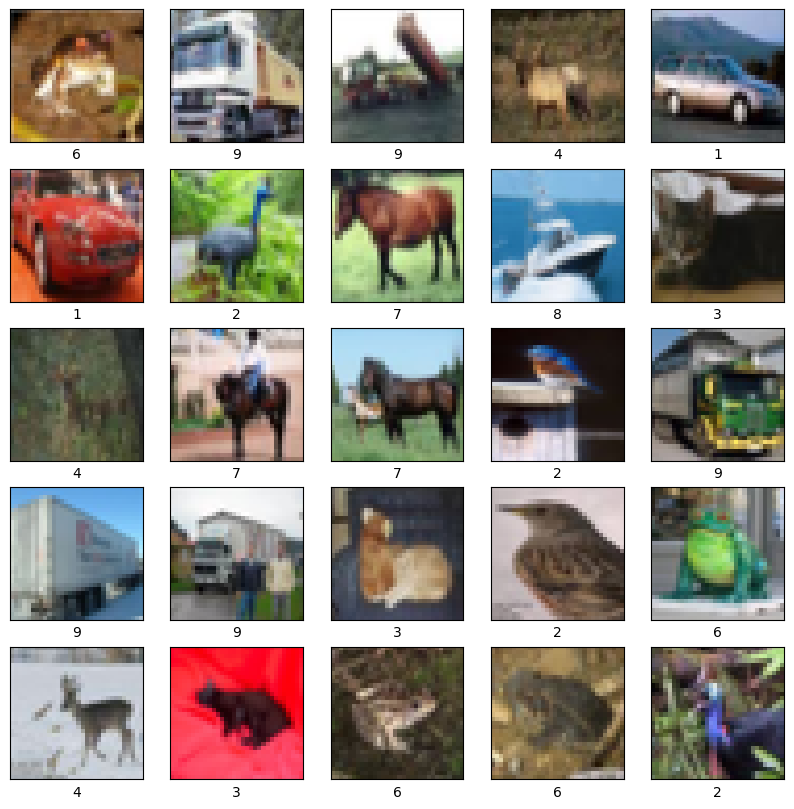

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3367 - loss: 1.7780 - val_accuracy: 0.5477 - val_loss: 1.2386
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5842 - loss: 1.1746 - val_accuracy: 0.6203 - val_loss: 1.0820
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6464 - loss: 1.0072 - val_accuracy: 0.6549 - val_loss: 0.9949
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.6847 - loss: 0.8897 - val_accuracy: 0.6739 - val_loss: 0.9250
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7077 - loss: 0.8294 - val_accuracy: 0.6992 - val_loss: 0.8728
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7333 - loss: 0.7564 - val_accuracy: 0.6940 - val_loss: 0.8880
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7507 - loss: 0.7099 - val_accuracy: 0.7133 - val_loss: 0.8376
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7681 -

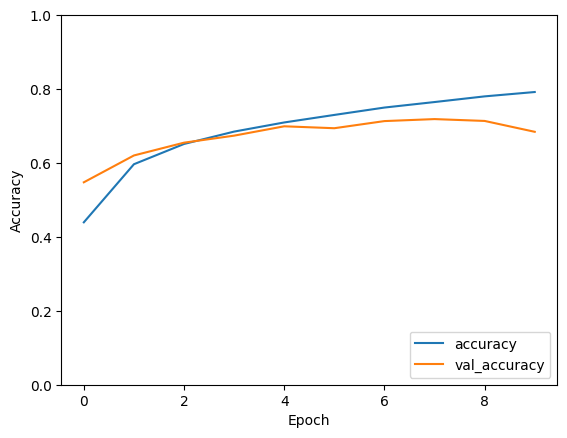

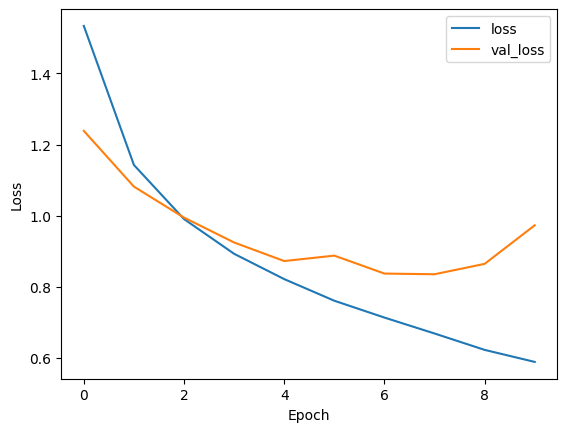

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Zadanie 2 (5 Pkt)

Wykorzystaj model z Zadania 1.

- Wyświetl filtry (wagi) z pierwszej warstwy konwolucyjnej po zakończeniu uczenia.
- Wybierz dowolny obraz testowy i zwizualizuj aktywacje dla tego obrazu po przejściu przez wybraną (jedną) warstwę konwolucyjną.

Shape of the first convolutional layer weights: (3, 3, 3, 32)


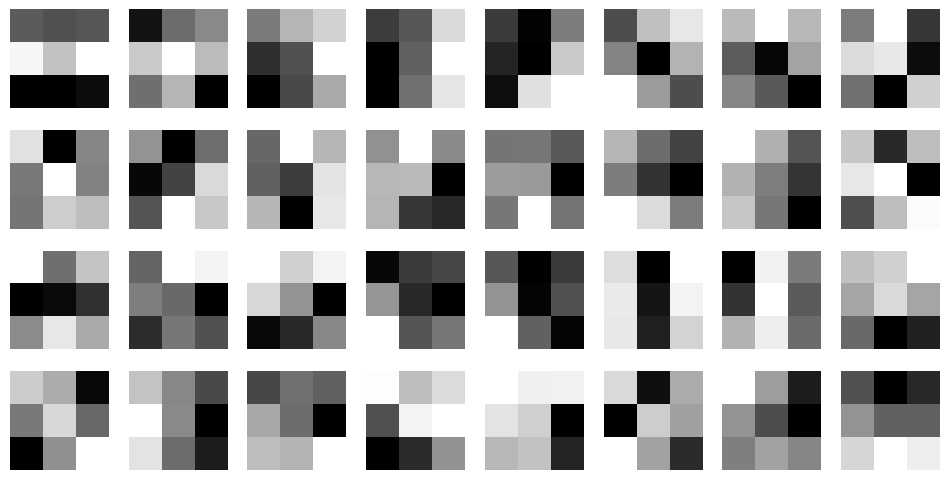

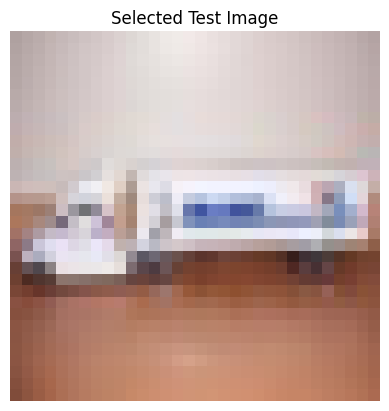

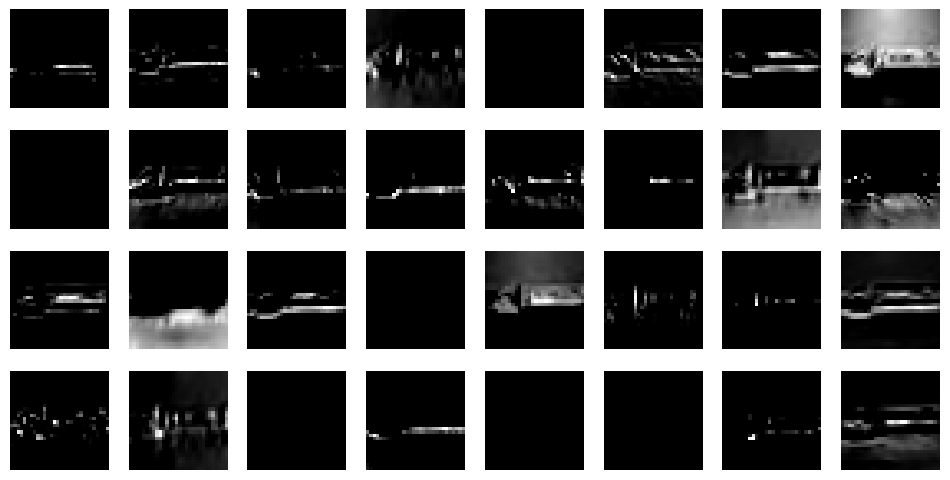

In [15]:
import numpy as np

first_layer_weights = model.layers[0].get_weights()[0]
print("Shape of the first convolutional layer weights:", first_layer_weights.shape)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.imshow(first_layer_weights[:, :, :, i].mean(axis=-1), cmap='gray')
    ax.axis('off')
plt.show()

image_index = 411
test_image = np.expand_dims(x_test[image_index], axis=0)
layer_output = model.layers[0](test_image)

# Display the selected image
plt.figure()
plt.imshow(x_test[image_index])  # Display the original image
plt.title("Selected Test Image")
plt.axis('off')
plt.show()

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.imshow(layer_output[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()

## Zadanie 3 (5 pkt)

Użyj tej samej sieci z Zadania 1, ale zastosuj różne metody regularyzacji.

- Spróbuj polepszyć wyniki dla zbioru walidacyjnego (testowego), stosując np. Dropout, regularyzację L2, czy augmentację danych.
- porównaj wyniki z modelem z Zadania 1 (porównaj accuracy na zbiorze walidacyjnym).

## Zadanie 4 (5 pkt)

Wykorzystaj pretrenowany model MobileNetV2 (lub inny mały model), dostępny w bibliotece Keras/PyTorch. Pamiętaj, aby wybrany model mógł obsługiwać obrazy o rozmiarach takich jak w wybranym zbiorze danych. W przeciwnym przypadku, przeskaluj obrazy do wymaganego rozmiaru

- Wczytaj pretrenowany model i zamroź wszystkie warstwy poza ostatnią warstwą klasyfikacyjną.
- Dodaj nową/e warstwę/y klasyfikacyjną/e dopasowaną/e do liczby klas w wybranym przez Ciebie zbiorze.
- Przetrenuj model tylko na dodanych przez siebie warstwach ostatniej warstwie przez 5 epok.
- Porównaj dokładność tego modelu z wynikami z Zadań 1 i 2